In [1]:
#Create data set
import glob
import pandas as pd
import re
import spacy
from string import punctuation
translator = str.maketrans('','',punctuation) 
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
from nltk.corpus import stopwords
stoplist = set(stopwords.words('english'))

numdocs = 200 #nuber of documents to be processed
path = '/home/tobias/Documents/RobotJudge/cases/' #path to the case files



cases = []
years = []
ids = []

nlp = spacy.load('en')
files = glob.glob(path + '*.txt')
i = 0


for file in files:
    if i > numdocs:
        break
    try:
        with open(file) as open_file:
            cases.append(open_file.read())
            years.append(re.findall(path + '(\d+)', file)[0])
            id = re.findall(path + '(\d+)_(\S)(\S)(\S)(\S)(\S)(\S)', file)[0]
            ids.append(''.join(id[1:7]))
            i += 1
    except:
            print("Error reading File")    
            
df  = pd.DataFrame({'caseid':ids,'text':cases, 'year':years})

def runSpacy(txt):
    return nlp(txt)

df['doc'] = df['text'].apply(runSpacy)


Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File


In [2]:
def normalize(doc): 
    sents = []
    for sent in doc.sents:
        sent = str(sent)
        sent = sent.replace('\r', ' ').replace('\n', ' ')
        lower = sent.lower() # all lower case
        nopunc = lower.translate(translator) # remove punctuation       
        words = nopunc.split() # split into tokens
        nostop = [w for w in words if w not in stoplist] # remove stopwords
        no_numbers = [w if not w.isdigit() else '#' for w in nostop] # normalize numbers
        stemmed = [stemmer.stem(w) for w in no_numbers] # stem each word
        tokens = []
        for i in stemmed:
            if len(i) > 1 and not any(char.isdigit() for char in i):
                tokens.append(i)
                
        sents.append(tokens)
    return sents
df['cleanSents'] = df['doc'].apply(normalize)
df.head()

,caseid,text,year,doc,cleanSents
0,X21KR0,PER CURIAM.\nThe sole question in this case i...,1962,"( , PER, CURIAM, ., \n, The, sole, question, i...","[[per, curiam], [sole, question, case, whether..."
1,X2NJD6,"MYRON L. GORDON, District Judge.\nThis is an ...",1973,"( , MYRON, L., GORDON, ,, District, Judge, ., ...","[[myron, gordon, district, judg], [interlocuto..."
2,X40B69,"WILBUR , Circuit Judge.\nThese two petitions ...",1941,"( , WILBUR, ,, Circuit, Judge, ., \n, These, t...","[[wilbur, circuit, judg], [two, petit, review,..."
3,X9VH38,"PER CURIAM.\nDefendant, convicted of selling ...",1965,"( , PER, CURIAM, ., \n, Defendant, ,, convicte...","[[per, curiam], [defend, convict, sell, marihu..."
4,XABN4A,"GOLDBERG , Circuit Judge: The segregation of ...",1984,"( , GOLDBERG, ,, Circuit, Judge, :, The, segre...","[[goldberg, circuit, judg], [segreg, one, grou..."


In [3]:
#Problem 1
#create sentences for w2v
sentences = []

def retsent(sents):
    for i in sents:
        sentences.append(i)
        
df['cleanSents'].apply(retsent)

from random import shuffle
shuffle(sentences) # stream in sentences in random order

sentences[0]

['thus',
 'choic',
 'statut',
 'limit',
 'depend',
 'upon',
 'particular',
 'fact',
 'precis',
 'legal',
 'theori',
 'claim',
 'counsel',
 'could',
 'almost',
 'alway',
 'argu',
 'consider',
 'forc',
 'two',
 'period',
 'limit',
 'appli',
 'claim']

In [4]:
# train the two different models
from gensim.models import Word2Vec
w2v = Word2Vec(sentences,  # list of tokenized sentences
               workers = 8, # Number of threads to run in parallel
               size=300,  # Word vector dimensionality     
               min_count =  25, # Minimum word count  
               window = 2, # Context window size      
               sample = 1e-3, # Downsample setting for frequent words
               )

# done training, so delete context vectors
w2v.init_sims(replace=True)

w2v15 = Word2Vec(sentences,  # list of tokenized sentences
               workers = 8, # Number of threads to run in parallel
               size=300,  # Word vector dimensionality     
               min_count =  25, # Minimum word count  
               window = 15, # Context window size      
               sample = 1e-3, # Downsample setting for frequent words
               )

# done training, so delete context vectors
w2v15.init_sims(replace=True)


w2v.wv['rule']


array([-0.11756643,  0.02160551,  0.04134628, -0.08025318, -0.05142608,
        0.06175127,  0.07144461, -0.00263642,  0.02795159, -0.08305913,
        0.09408034,  0.04596418, -0.07167339, -0.03343818,  0.0079757 ,
       -0.02608341, -0.04380759, -0.0087834 ,  0.04234772, -0.08795836,
       -0.04206831, -0.02861145, -0.01359633, -0.02937405, -0.0492783 ,
        0.05643629, -0.05874028, -0.03162526,  0.03191495,  0.02677936,
       -0.03131104, -0.02158692, -0.02725003, -0.02537089, -0.08388083,
        0.03142617, -0.05503586,  0.03574604,  0.05546637,  0.06034281,
        0.02917011,  0.06953471,  0.02943759, -0.03784359,  0.11586373,
       -0.00184244, -0.05675869, -0.07053011,  0.05970412, -0.07892098,
        0.04276135, -0.03037222,  0.02890735, -0.03352235,  0.07124507,
        0.01539885,  0.02062218, -0.03186364, -0.00853959, -0.09664422,
        0.02115236, -0.07220518,  0.01085419, -0.02149935,  0.03304991,
        0.01677344,  0.0793997 ,  0.04853962, -0.04101787, -0.09

In [5]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
vocab = list(w2v.wv.vocab)
X = w2v[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

dfw2v = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

dfw2v['word'] = vocab

dfw2v.head()




vocab15 = list(w2v15.wv.vocab)
X15 = w2v15[vocab]

tsne15 = TSNE(n_components=2)
X_tsne15 = tsne15.fit_transform(X15)

dfw2v15 = pd.DataFrame(X_tsne15, index=vocab, columns=['x', 'y'])

dfw2v15['word'] = vocab15

dfw2v15.head()


/home/tobias/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
/home/tobias/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


,x,y,word
thus,-11.429401,41.217754,thus
choic,-0.308565,28.334414,choic
statut,-16.355125,23.526094,statut
limit,-16.004431,23.412191,limit
depend,-10.641471,19.505079,depend


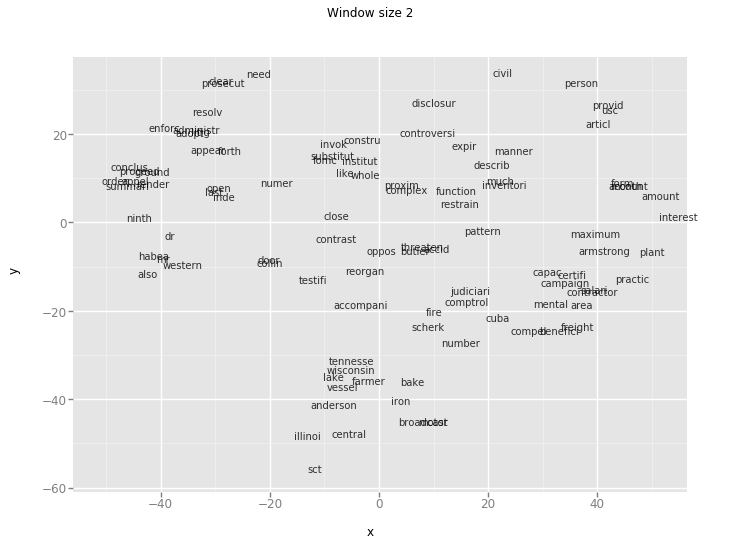

In [6]:
dfw2v100 = dfw2v.sample(100)

import ggplot as gg
chart = gg.ggplot( dfw2v100, gg.aes(x='x', y='y', label='word') ) \
                      + gg.geom_text(size=10, alpha=.8, label='word') 
chart.title = 'Window size 2'
chart.show()

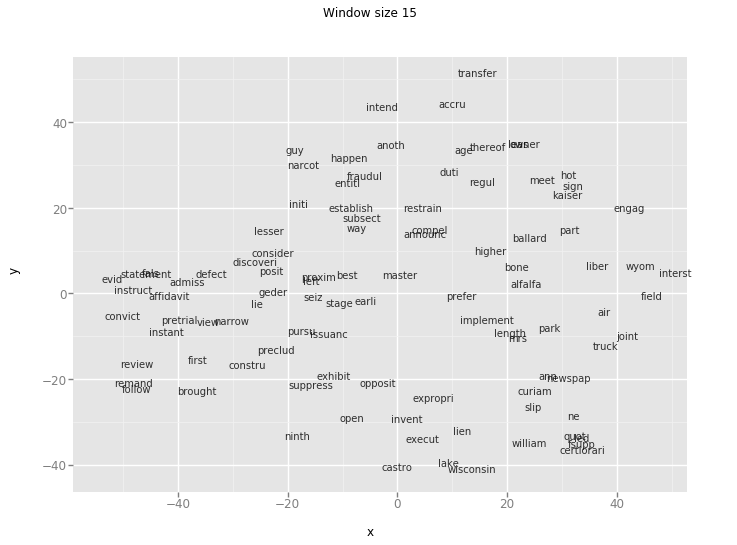

In [10]:
dfw2v15100 = dfw2v15.sample(100)

chart15 = gg.ggplot( dfw2v15100, gg.aes(x='x', y='y', label='word') ) \
                      + gg.geom_text(size=10, alpha=.8, label='word') 

chart15.title = 'Window size 15'
chart15.show()

In [11]:
#Problem 2

dfMeta = pd.read_csv('cases_metadata.csv')
dfMeta.head()

,caseid,case_reversed,judge_id,year,x_republican,log_cites
0,X3JGGO,0,1653.0,1925.0,1.0,1.098612
1,X3OH3J,0,1034.0,1924.0,0.0,1.609438
2,X3U0KO,0,2303.0,1925.0,0.0,1.791759
3,X53HAD,0,1764.0,1924.0,0.0,NaN
4,X9VC5V,0,493.0,1925.0,1.0,NaN


In [12]:
#Drop cases from judges with unknown party
join = df.merge(dfMeta, on='caseid')
join.head()
join.dropna(inplace = True)
join.head()

,caseid,text,year_x,doc,cleanSents,case_reversed,judge_id,year_y,x_republican,log_cites
2,X40B69,"WILBUR , Circuit Judge.\nThese two petitions ...",1941,"( , WILBUR, ,, Circuit, Judge, ., \n, These, t...","[[wilbur, circuit, judg], [two, petit, review,...",0,2241.0,1941.0,1.0,1.945910
4,XABN4A,"GOLDBERG , Circuit Judge: The segregation of ...",1984,"( , GOLDBERG, ,, Circuit, Judge, :, The, segre...","[[goldberg, circuit, judg], [segreg, one, grou...",0,759.0,1984.0,0.0,2.890372
5,X2O4KF,"HENLEY, Circuit Judge.\nNeil T. Naftalin, app...",1978,"( , HENLEY, ,, Circuit, Judge, ., \n, Neil, T....","[[henley, circuit, judg], [neil, naftalin, app...",1,908.0,1978.0,1.0,1.098612
6,X3RRRH,"WASHINGTON , Circuit Judge.\nThis case concer...",1957,"( , WASHINGTON, ,, Circuit, Judge, ., \n, This...","[[washington, circuit, judg], [case, concern, ...",1,2185.0,1957.0,0.0,2.772589
7,X447T8,"WALLER , Circuit Judge.\nThe United States, t...",1950,"( , WALLER, ,, Circuit, Judge, ., \n, The, Uni...","[[waller, circuit, judg], [unit, state, hous, ...",1,2166.0,1950.0,0.0,2.708050


In [14]:
sentencesD = []

def retsent(sents):
    for i in sents:
        sentencesD.append(i)
        
        
dem = join.loc[join['x_republican'] == 0]

dem['cleanSents'].apply(retsent)
sentencesD[0:4]

[['goldberg', 'circuit', 'judg'],
 ['segreg',
  'one',
  'group',
  'rest',
  'societi',
  'histor',
  'benchmark',
  'unfair',
  'discrimin',
  'countri'],
 ['segreg',
  'perpetu',
  'fals',
  'stereotyp',
  'exil',
  'group',
  'lead',
  'virtual',
  'cast',
  'system',
  'built',
  'misconcept'],
 ['thus',
  'black',
  'unabl',
  'disprov',
  'racist',
  'stereotyp',
  'long',
  'exclud',
  'white',
  'neighborhood',
  'children',
  'isol',
  'segreg',
  'school']]

In [15]:
sentencesR = []

def retsent1(sents):
    for i in sents:
        sentencesR.append(i)
        
        
dem = join.loc[join['x_republican'] == 1]

dem['cleanSents'].apply(retsent1)
sentencesR[0:4]

[['wilbur', 'circuit', 'judg'],
 ['two',
  'petit',
  'review',
  'decis',
  'board',
  'tax',
  'appeal',
  'consolid',
  'hear',
  'involv',
  'incom',
  'tax',
  'year'],
 ['fact', 'disput'],
 ['marlborough',
  'invest',
  'compani',
  'corpor',
  'issu',
  'bond',
  'aggreg',
  'secur',
  'trust',
  'deed',
  'apart',
  'build',
  'known',
  'marlborough',
  'hous',
  'person',
  'properti',
  'therein']]

In [18]:
from gensim.models import Word2Vec
w2vD = Word2Vec(sentencesD,  # list of tokenized sentences
               workers = 8, # Number of threads to run in parallel
               size=300,  # Word vector dimensionality     
               min_count =  25, # Minimum word count  
               window = 5, # Context window size      
               sample = 1e-3, # Downsample setting for frequent words
               )

vocabD = w2vD.wv.vocab

w2vD.wv.vocab

{'circuit': <gensim.models.keyedvectors.Vocab at 0x7fcb6f9921d0>,
 'judg': <gensim.models.keyedvectors.Vocab at 0x7fcb6f992128>,
 'one': <gensim.models.keyedvectors.Vocab at 0x7fcb6f992198>,
 'group': <gensim.models.keyedvectors.Vocab at 0x7fcb6f992160>,
 'unfair': <gensim.models.keyedvectors.Vocab at 0x7fcb6f9920f0>,
 'discrimin': <gensim.models.keyedvectors.Vocab at 0x7fcb6f9920b8>,
 'fals': <gensim.models.keyedvectors.Vocab at 0x7fcb6f992080>,
 'system': <gensim.models.keyedvectors.Vocab at 0x7fcb6f992048>,
 'thus': <gensim.models.keyedvectors.Vocab at 0x7fcb6fab3fd0>,
 'long': <gensim.models.keyedvectors.Vocab at 0x7fcb6fab3f98>,
 'exclud': <gensim.models.keyedvectors.Vocab at 0x7fcb6fab3f60>,
 'moreov': <gensim.models.keyedvectors.Vocab at 0x7fcb6fab3f28>,
 'effect': <gensim.models.keyedvectors.Vocab at 0x7fcb6fab3ef0>,
 'lack': <gensim.models.keyedvectors.Vocab at 0x7fcb6fab3eb8>,
 'polit': <gensim.models.keyedvectors.Vocab at 0x7fcb6fab3e80>,
 'power': <gensim.models.keyedvector

In [19]:
w2vR = Word2Vec(sentencesR,  # list of tokenized sentences
               workers = 8, # Number of threads to run in parallel
               size=300,  # Word vector dimensionality     
               min_count =  25, # Minimum word count  
               window = 5, # Context window size      
               sample = 1e-3, # Downsample setting for frequent words
               )

w2vR.wv.vocab

{'circuit': <gensim.models.keyedvectors.Vocab at 0x7fcb995bce48>,
 'judg': <gensim.models.keyedvectors.Vocab at 0x7fcb91761c88>,
 'two': <gensim.models.keyedvectors.Vocab at 0x7fcb6f99e6a0>,
 'petit': <gensim.models.keyedvectors.Vocab at 0x7fcb6f99ef98>,
 'review': <gensim.models.keyedvectors.Vocab at 0x7fcb6f99ef60>,
 'decis': <gensim.models.keyedvectors.Vocab at 0x7fcb6f99e1d0>,
 'board': <gensim.models.keyedvectors.Vocab at 0x7fcb6f99e470>,
 'tax': <gensim.models.keyedvectors.Vocab at 0x7fcb6f99e160>,
 'appeal': <gensim.models.keyedvectors.Vocab at 0x7fcb6f99e6d8>,
 'hear': <gensim.models.keyedvectors.Vocab at 0x7fcb6f99e668>,
 'involv': <gensim.models.keyedvectors.Vocab at 0x7fcb6f99e630>,
 'incom': <gensim.models.keyedvectors.Vocab at 0x7fcb6f99e5f8>,
 'year': <gensim.models.keyedvectors.Vocab at 0x7fcb6f99e5c0>,
 'fact': <gensim.models.keyedvectors.Vocab at 0x7fcb6f99e588>,
 'disput': <gensim.models.keyedvectors.Vocab at 0x7fcb6f99e550>,
 'invest': <gensim.models.keyedvectors.Voc